# Part I - Loan Data from Prosper
## by Kelton Cumbe

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. In this project we will be exploring a dataset known as the Prosper Loan Dataset. The Prosper Loan Dataset is a dataset that contains data of the loan platform known as '<a href="https://www.prosper.com/">Prosper</a>'. 



## Preliminary Wrangling

Here we will import all necessary packages and wrangle information of file uploaded in the workspace, with name ProsperLoanData, that will be loaded with pandas, and then make it clean and suitable for the present exploration session.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading the uploaded file information 
main_df = pd.read_csv('prosperLoanData.csv')

In [3]:
#Confirm the given shape information
print(main_df.shape)

(113937, 81)


In [4]:
#First data visualization of datatypes and their columns
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#Additional starter visualization
main_df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
#Make a copy of the dataframe
duplicated_df = main_df.copy()

In [7]:
#Updating the name of ListingCategory (numeric) into ListingCategory 
duplicated_df.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

In [8]:
#Updating the datatype from Int to string of the column indicated above
duplicated_df['ListingCategory'] = duplicated_df['ListingCategory'].astype('str')

In [9]:
#Updating the ListingCategories values to their actual correct categories.

duplicated_df.loc[duplicated_df['ListingCategory'] == '0', ['ListingCategory']] = "Not Available"
duplicated_df.loc[duplicated_df['ListingCategory'] == '1', ['ListingCategory']] = "Debt Consolidation"
duplicated_df.loc[duplicated_df['ListingCategory'] == '2', ['ListingCategory']] = "Home Improvement"
duplicated_df.loc[duplicated_df['ListingCategory'] == '3', ['ListingCategory']] = "Business"
duplicated_df.loc[duplicated_df['ListingCategory'] == '4', ['ListingCategory']] = "Personal Loan"
duplicated_df.loc[duplicated_df['ListingCategory'] == '5', ['ListingCategory']] = "Student Use"
duplicated_df.loc[duplicated_df['ListingCategory'] == '6', ['ListingCategory']] = "Auto"
duplicated_df.loc[duplicated_df['ListingCategory'] == '7', ['ListingCategory']] = "Other"
duplicated_df.loc[duplicated_df['ListingCategory'] == '8', ['ListingCategory']] = "Baby&Adoption"
duplicated_df.loc[duplicated_df['ListingCategory'] == '9', ['ListingCategory']] = "Boat"
duplicated_df.loc[duplicated_df['ListingCategory'] == '10', ['ListingCategory']] = "Cosmetic Procedure"
duplicated_df.loc[duplicated_df['ListingCategory'] == '11', ['ListingCategory']] = "Engagement Ring"
duplicated_df.loc[duplicated_df['ListingCategory'] == '12', ['ListingCategory']] = "Green Loans"
duplicated_df.loc[duplicated_df['ListingCategory'] == '13', ['ListingCategory']] = "Household Expenses"
duplicated_df.loc[duplicated_df['ListingCategory'] == '14', ['ListingCategory']] = "Large Purchases"
duplicated_df.loc[duplicated_df['ListingCategory'] == '15', ['ListingCategory']] = "Medical/Dental"
duplicated_df.loc[duplicated_df['ListingCategory'] == '16', ['ListingCategory']] = "Motorcycle"
duplicated_df.loc[duplicated_df['ListingCategory'] == '17', ['ListingCategory']] = "RV"
duplicated_df.loc[duplicated_df['ListingCategory'] == '18', ['ListingCategory']] = "Raxes"
duplicated_df.loc[duplicated_df['ListingCategory'] == '19', ['ListingCategory']] = "Vacation"
duplicated_df.loc[duplicated_df['ListingCategory'] == '20', ['ListingCategory']] = "Wedding Loans"

In [10]:
#Checking the value counts of the ListingCategory
duplicated_df['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Raxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [11]:
#Prosper Loan Data descripition.
duplicated_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [12]:
#Unordinated ArrayList of variables of interest or acquired collection list
acquired = ['BorrowerAPR', 'BorrowerRate', 'ListingCategory', 'EmploymentStatus', 'CurrentCreditLines',
           'OpenRevolvingAccounts','LoanStatus', 'OpenRevolvingMonthlyPayment', 'TotalProsperLoans', 'ProsperPrincipalBorrowed', 
            'LP_InterestandFees']

In [13]:
#Getting Separated Dataframe
acquired_values = duplicated_df[acquired]

In [14]:
#Showing the new Separated Dataframe
acquired_values.describe()

,BorrowerAPR,BorrowerRate,CurrentCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,TotalProsperLoans,ProsperPrincipalBorrowed,LP_InterestandFees
count,113912.000000,113937.000000,106333.000000,113937.00000,113937.000000,22085.000000,22085.000000,113937.000000
mean,0.218828,0.192764,10.317192,6.96979,398.292161,1.421100,8472.311961,1077.542901
std,0.080364,0.074818,5.457866,4.63097,447.159711,0.764042,7395.507650,1183.414168
min,0.006530,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.349900
25%,0.156290,0.134000,7.000000,4.00000,114.000000,1.000000,3500.000000,274.870000
50%,0.209760,0.184000,10.000000,6.00000,271.000000,1.000000,6000.000000,700.840100
75%,0.283810,0.250000,13.000000,9.00000,525.000000,2.000000,11000.000000,1458.540000
max,0.512290,0.497500,59.000000,51.00000,14985.000000,8.000000,72499.000000,15617.030000


In [15]:
#Presentation info of the acquired_values
acquired_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BorrowerAPR                  113912 non-null  float64
 1   BorrowerRate                 113937 non-null  float64
 2   ListingCategory              113937 non-null  object 
 3   EmploymentStatus             111682 non-null  object 
 4   CurrentCreditLines           106333 non-null  float64
 5   OpenRevolvingAccounts        113937 non-null  int64  
 6   LoanStatus                   113937 non-null  object 
 7   OpenRevolvingMonthlyPayment  113937 non-null  float64
 8   TotalProsperLoans            22085 non-null   float64
 9   ProsperPrincipalBorrowed     22085 non-null   float64
 10  LP_InterestandFees           113937 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.6+ MB


In [16]:
#Prosper Loan head
acquired_values.head(3)

,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatus,CurrentCreditLines,OpenRevolvingAccounts,LoanStatus,OpenRevolvingMonthlyPayment,TotalProsperLoans,ProsperPrincipalBorrowed,LP_InterestandFees
0,0.16516,0.158,Not Available,Self-employed,5.0,1,Completed,24.0,NaN,NaN,1971.14
1,0.12016,0.092,Home Improvement,Employed,14.0,13,Current,389.0,NaN,NaN,0.00
2,0.28269,0.275,Not Available,Not available,NaN,0,Completed,0.0,NaN,NaN,1185.63


### What is the structure of your dataset?

The present dataset are composed of 81 columns variables, and 113937 row records of loans data. Here we can find a table mostly composed of following data structure, such as float and int datatypes, in resume, we can find: 3 booleans, 11 int, 17 objects and 50 float.

Due to the exploration task, these datasets were further divided into a smaller dataframe called `acquired_values` containing just the variables of interest for our analysis. The `acquired_values` consists of 11 variables of which 7 are float, 1 is an int and 3 are of object type.

### What is/are the main feature(s) of interest in your dataset?

For the present dataset the main feature, that I'm interested, is to determines the current loan status. The `LoanStatus` is the declared variable that hook the actual status of the borrower. And the status can be one of the following variable or value: `Current`, `Completed`, `Cancelled`, `Chargedoff`, `Default`, `PastDue` and `FinalPayment`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For my current analysis, the probably features that may support my investigation in this dataset are ListingCategory, EmploymentStatus, CurrentCreditLines, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, TotalProsperLoans, ProsperPrincipalBorrowed, LP_InterestandFees, also we have `LoanStatus` that would be influenced more by the borrowers.

## Univariate Exploration

For this section, we will be exploring the acquired data from `main_df`, and showing suitable plots or charts. And to do that, we will precede first with the main variable of interest called here as LoanStatus.


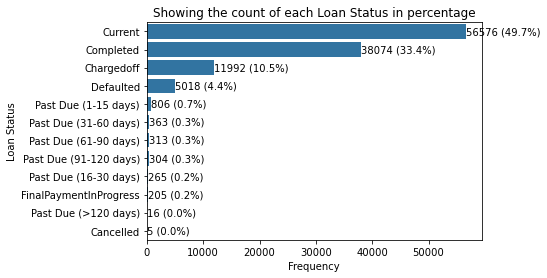

In [126]:
#Plot the bar horizontally and show the counts beside each bar
show_color = sb.color_palette()[0]

index = acquired_values['LoanStatus'].value_counts().index
counts = acquired_values['LoanStatus'].value_counts()
value = acquired_values.shape[0]

sb.countplot(data = acquired_values, y = 'LoanStatus', color = show_color, order = index);
plt.title('Showing the count of each Loan Status in percentage');
plt.xlabel('Frequency');
plt.ylabel('Loan Status');

for i in range(counts.shape[0]):
    Count = counts[i]
    percentage = '{:0.1f}%'.format(100*Count/value)
    plt.text(Count+1, i,"{0}".format(Count)+" ({0})".format(percentage)  , va = 'center');

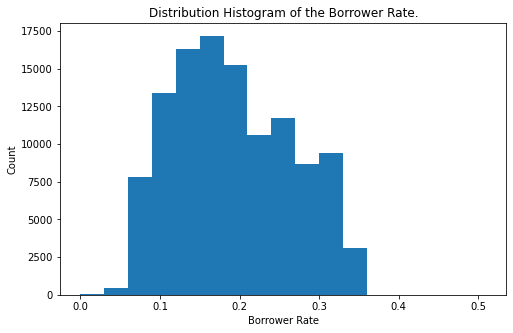

In [19]:
#Here we have a Histogram showing Distribution of Borrower
size = 0.030
bins = np.arange(0, acquired_values['BorrowerRate'].max()+size, size)

plt.figure(figsize = [8, 5]);
plt.hist(acquired_values['BorrowerRate'], bins = bins);
plt.title('Distribution Histogram of the Borrower Rate.');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

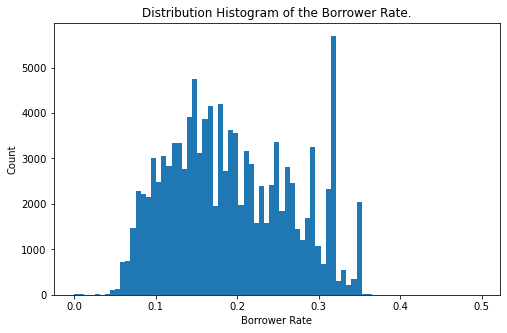

In [20]:
#Showing adjusted Bin Size of Histogram of Borrower Rate
size = 0.00630
bins = np.arange(0, acquired_values['BorrowerRate'].max()+size, size)

plt.figure(figsize = [8, 5]);
plt.hist(acquired_values.BorrowerRate, bins = bins);
plt.title('Distribution Histogram of the Borrower Rate.');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

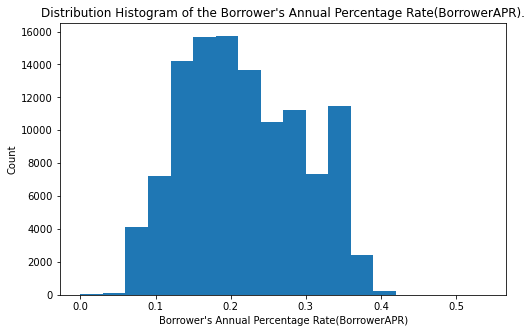

In [21]:
size = 0.030
bins = np.arange(0, acquired_values['BorrowerAPR'].max()+size, size)

plt.figure(figsize = [8, 5]);
plt.hist(acquired_values.BorrowerAPR.dropna(), bins = bins);
plt.title('Distribution Histogram of the Borrower\'s Annual Percentage Rate(BorrowerAPR).');
plt.xlabel('Borrower\'s Annual Percentage Rate(BorrowerAPR)');
plt.ylabel('Count');

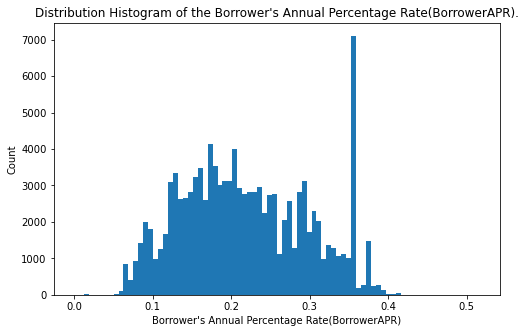

In [22]:
size = 0.00630
bins = np.arange(0, acquired_values['BorrowerAPR'].max()+size, size)

plt.figure(figsize = [8, 5]);
plt.hist(acquired_values['BorrowerAPR'].dropna(), bins = bins);
plt.title('Distribution Histogram of the Borrower\'s Annual Percentage Rate(BorrowerAPR).');
plt.xlabel('Borrower\'s Annual Percentage Rate(BorrowerAPR)');
plt.ylabel('Count');

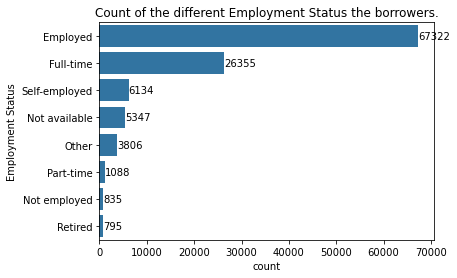

In [23]:
employment_order = acquired_values['EmploymentStatus'].value_counts().index
employment_counts = acquired_values['EmploymentStatus'].value_counts()

sb.countplot(data = main_df, y = 'EmploymentStatus', color = show_color, order = employment_order);

plt.title('Count of the different Employment Status the borrowers.');
plt.ylabel('Employment Status');

for i in range(employment_counts.shape[0]):
    count = employment_counts[i]
    plt.text(count+1, i, count, va = 'center');

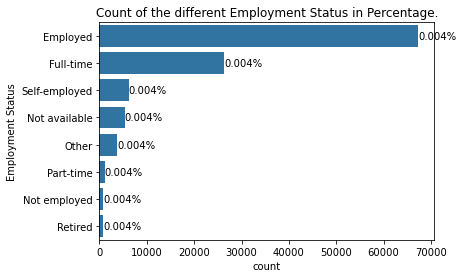

In [24]:
sb.countplot(data = acquired_values, y = 'EmploymentStatus', color = show_color, order = employment_order);

plt.title('Count of the different Employment Status in Percentage.');
plt.ylabel('Employment Status');

for i in range(employment_counts.shape[0]):
    count = employment_counts[i]
    percentage = '{:0.3f}%'.format(100*Count/value)
    plt.text(count+1, i, percentage, va = 'center');

Accondig with above chart, majority of the borrowers on Prosper loan platform are employed with the percentage of 59.087% employed people, that is more than half of the population. 

The next categories are following:
    **Full-time:** 23.131%; 
    **Self-employed:** 5.384%;
    **Not available:**  4.693%;
    **Other:** 3.340%; 
    **Not employed and Retired** - under 1% each.

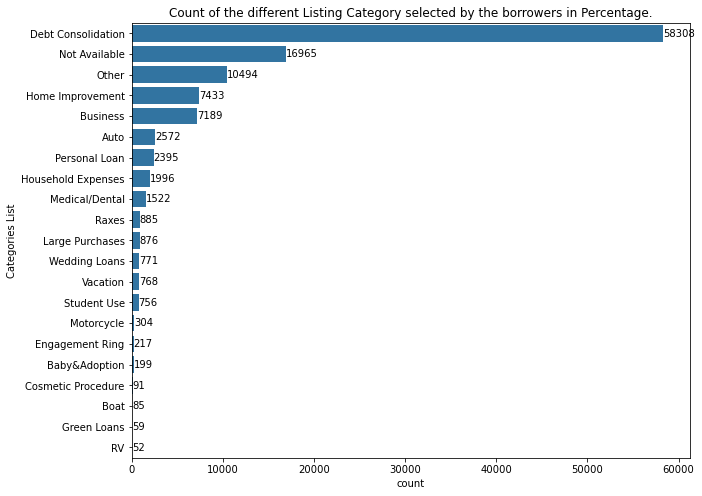

In [25]:
category_order = acquired_values['ListingCategory'].value_counts().index
category_counts = acquired_values['ListingCategory'].value_counts()

plt.figure(figsize = [10, 8])
sb.countplot(data = acquired_values, y = 'ListingCategory', color = show_color, order = category_order);

plt.title('Count of the different Listing Category selected by the borrowers in Percentage.');
plt.ylabel('Categories List');

for i in range(category_counts.shape[0]):
    count = category_counts[i]
    plt.text(count+1, i, count, va = 'center');

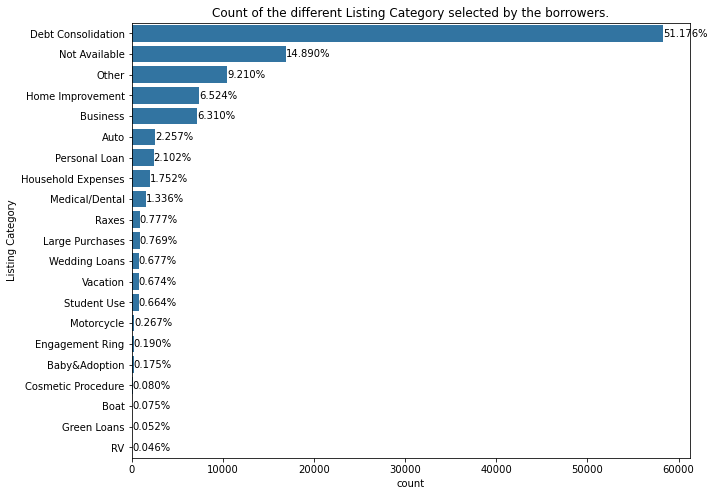

In [26]:
category_order = acquired_values['ListingCategory'].value_counts().index
category_counts = acquired_values['ListingCategory'].value_counts()

loan_number = acquired_values.shape[0]
plt.figure(figsize = [10, 8])
sb.countplot(data = acquired_values, y = 'ListingCategory', color = show_color, order = category_order);

plt.title('Count of the different Listing Category selected by the borrowers.');
plt.ylabel('Listing Category');

for i in range(category_counts.shape[0]):
    count = category_counts[i]
    percentage = '{:0.3f}%'.format(100*count/loan_number)
    plt.text(count+1, i, percentage, va = 'center');

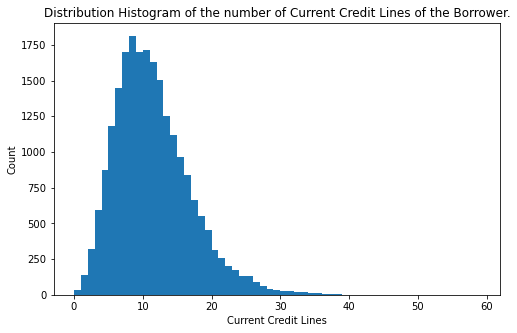

In [27]:
binsize = 1
bins = np.arange(0, acquired_values['CurrentCreditLines'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = acquired_values.dropna(), x = "CurrentCreditLines", bins = bins);
plt.title('Distribution Histogram of the number of Current Credit Lines of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Current Credit Lines');

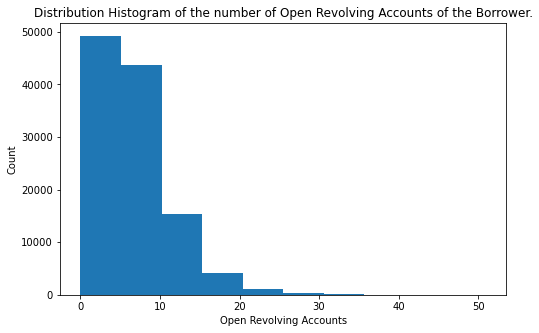

In [28]:
plt.figure(figsize = [8, 5]);
plt.hist(data = acquired_values, x = "OpenRevolvingAccounts");
plt.title('Distribution Histogram of the number of Open Revolving Accounts of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Open Revolving Accounts');

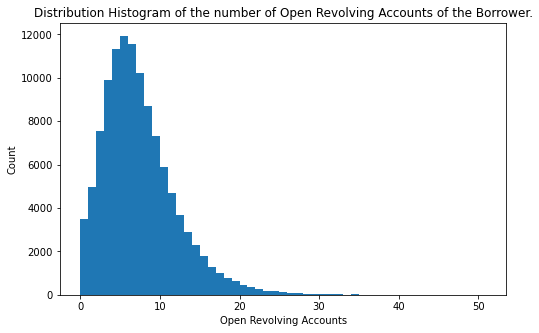

In [29]:
binsize = 1
bins = np.arange(0, acquired_values['OpenRevolvingAccounts'].max()+binsize, binsize)

plt.figure(figsize = [8,5]);
plt.hist(data = acquired_values, x = "OpenRevolvingAccounts", bins = bins);
plt.title('Distribution Histogram of the number of Open Revolving Accounts of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Open Revolving Accounts');

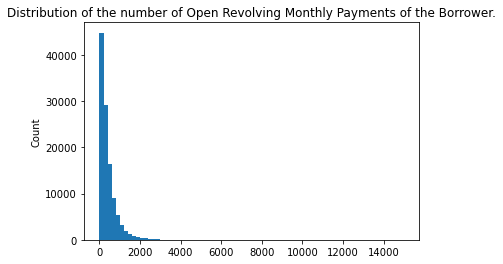

In [30]:
binsize = 200
bins = np.arange(0, acquired_values['OpenRevolvingMonthlyPayment'].max()+binsize, binsize)

plt.hist(data = acquired_values, x = "OpenRevolvingMonthlyPayment", bins = bins);
plt.title('Distribution of the number of Open Revolving Monthly Payments of the Borrower.');
plt.ylabel('Count');

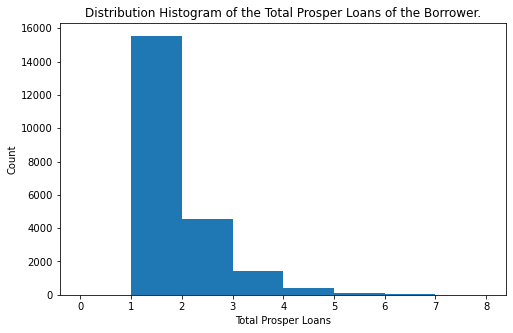

In [31]:
binsize = 1
bins = np.arange(0, acquired_values['TotalProsperLoans'].max()+binsize, binsize)

plt.figure(figsize = [8,5]);
plt.hist(data = acquired_values.dropna(), x = "TotalProsperLoans", bins = bins);
plt.title('Distribution Histogram of the Total Prosper Loans of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Total Prosper Loans');

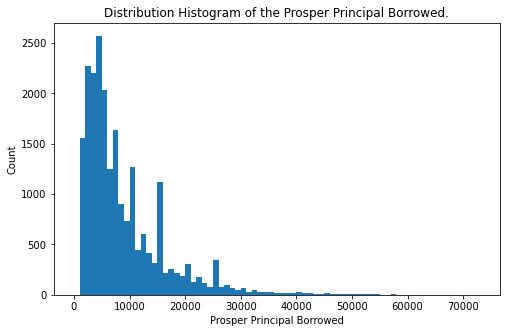

In [32]:
#Standard Scale
binsize = 1000
bins = np.arange(0, acquired_values['ProsperPrincipalBorrowed'].max()+binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = acquired_values.dropna(), x = "ProsperPrincipalBorrowed", bins = bins);
plt.title('Distribution Histogram of the Prosper Principal Borrowed.');
plt.ylabel('Count');
plt.xlabel('Prosper Principal Borrowed');

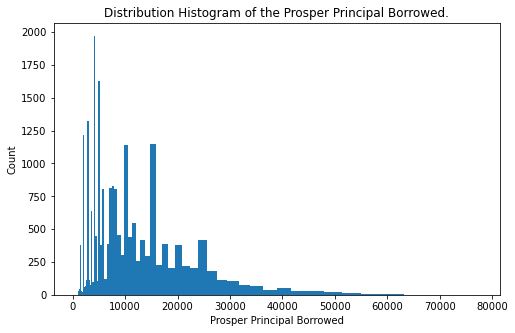

In [33]:
log_binsize = 0.030
bins = 10 ** np.arange(2.4, np.log10(acquired_values['ProsperPrincipalBorrowed'].max())+log_binsize, log_binsize)


plt.figure(figsize = [8, 5])
plt.hist(data = acquired_values.dropna(), x = "ProsperPrincipalBorrowed", bins = bins);
plt.title('Distribution Histogram of the Prosper Principal Borrowed.');
plt.ylabel('Count');
plt.xlabel('Prosper Principal Borrowed');

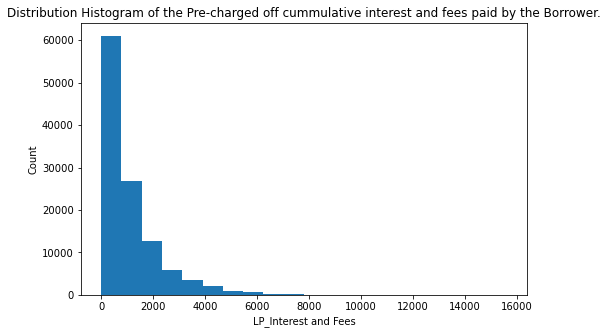

In [34]:
#Plot the distribution of the LP Interest and Fees
plt.figure(figsize = [8, 5])
plt.hist(data = acquired_values, x = "LP_InterestandFees", bins = 20);
plt.title('Distribution Histogram of the Pre-charged off cummulative interest and fees paid by the Borrower.');
plt.ylabel('Count');
plt.xlabel('LP_Interest and Fees');

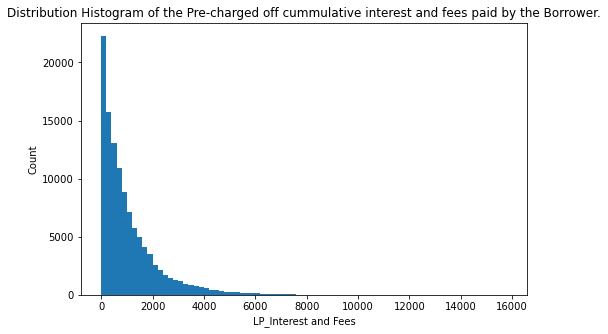

In [35]:
binsize = 200
bins = np.arange(0, acquired_values['LP_InterestandFees'].max()+binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = acquired_values, x = "LP_InterestandFees", bins = bins);
plt.title('Distribution Histogram of the Pre-charged off cummulative interest and fees paid by the Borrower.');
plt.ylabel('Count');
plt.xlabel('LP_Interest and Fees');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In response the Loan Status variable had most of its counts in the 'current' category with nearly half of the population being current. The bar chart showed that 49,556\% of the population is still on loan term while 33,317\% has already completed it. 10,525\% were charedoff while 4,404\% defaulted. The other categories, which include Past Due, Final Payment in Progress and Canceled, did not add up to 2\% combined.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the commands and instructions above, I initially had to treat the `ListingCategory` column where it was necessary to change its data type to string.
And about the `BorrowerRate`, when the bins were adjusted, I found some high peaks on the right side of the distribution when plotted in smaller boxes, which are seen as unimodal and slightly skewed to the right.

## Bivariate Exploration

In this section, We will be focus on answering the following questions:

* Which result affects the Loan's result status?
* What Affects the Borrowers Interest Rate?

In [36]:
#Categorical and Numerical variables array list
numerical_vars = ['BorrowerRate', 'BorrowerAPR', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 
                  'TotalProsperLoans', 'ProsperPrincipalBorrowed', 'LP_InterestandFees']
categorical_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategory']

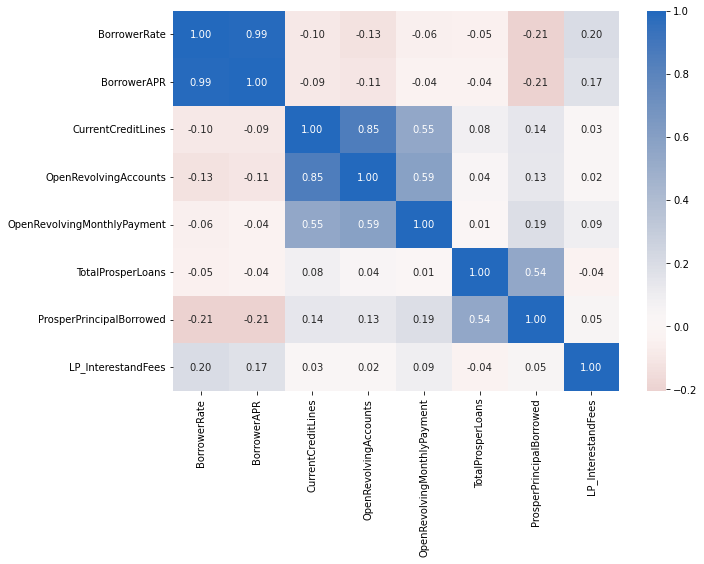

In [37]:
#Showing the relationships between all the numerical variables
plt.figure(figsize = [10, 7])
sb.heatmap(acquired_values[numerical_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

### I. Question: Which result affects the Loan's result status?

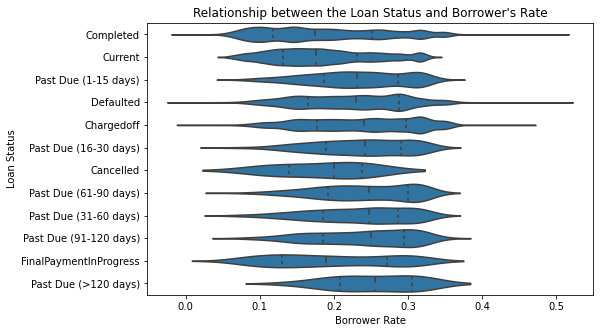

In [38]:
plt.figure(figsize = [8,5])
sb.violinplot(data = acquired_values, y = 'LoanStatus', x = 'BorrowerRate', color= show_color, inner = 'quartiles' );
plt.title('Relationship between the Loan Status and Borrower\'s Rate');
plt.ylabel('Loan Status');
plt.xlabel('Borrower Rate');

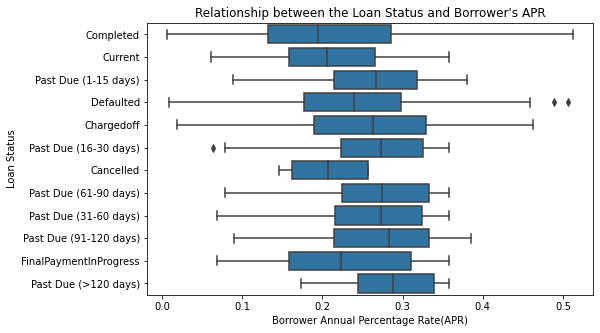

In [39]:
plt.figure(figsize = [8,5])
sb.boxplot(data = acquired_values, y = 'LoanStatus', x = 'BorrowerAPR', color= show_color );
plt.title('Relationship between the Loan Status and Borrower\'s APR');
plt.ylabel('Loan Status');
plt.xlabel('Borrower Annual Percentage Rate(APR)');

Text(0.5, 1.0, 'Relationship between the Loan Status and Employment Status.')

<Figure size 576x432 with 0 Axes>

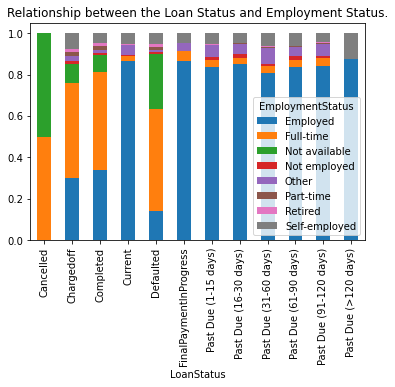

In [40]:
#Stacked barchart of the LoanStatus and EmploymentStatus

loan_vs_employment = pd.crosstab(acquired_values['LoanStatus'], acquired_values['EmploymentStatus'], normalize = 'index')

plt.figure(figsize = [8, 6]);
loan_vs_employment.plot.bar(stacked = True);
plt.xticks(rotation = 90);
plt.title('Relationship between the Loan Status and Employment Status.')

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Faceted Group bar chart of EmploymentStatus vs LoanStatus')

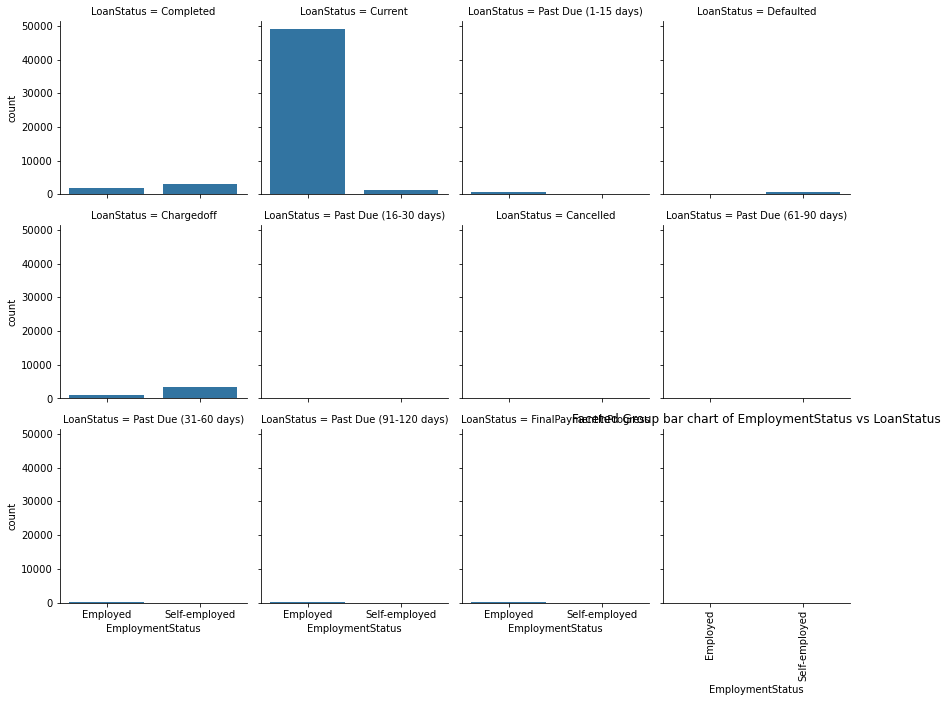

In [41]:
#Faceted group bar chart of the EmploymentStatus vs LoanStatus.
g = sb.FacetGrid(data = acquired_values, col = 'LoanStatus', col_wrap = 4);
g.map(sb.countplot, 'EmploymentStatus');
plt.xticks(rotation = 90);
plt.title('Faceted Group bar chart of EmploymentStatus vs LoanStatus')

<Figure size 1440x576 with 0 Axes>

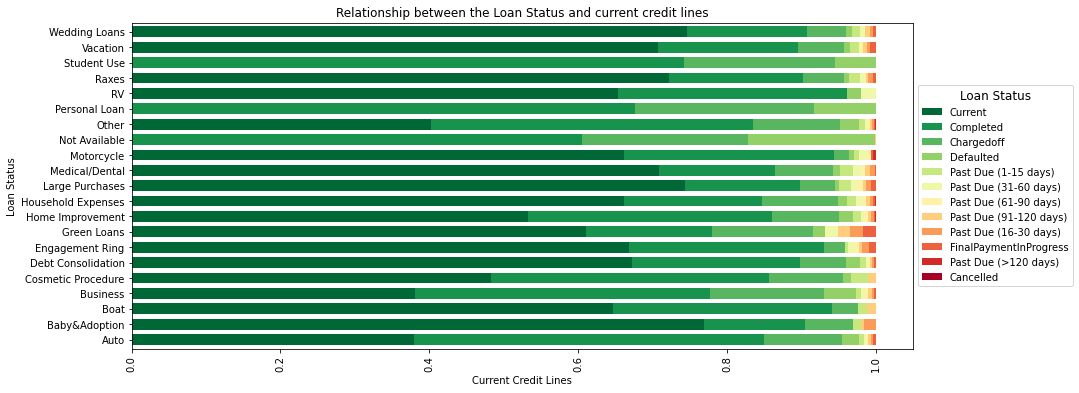

In [144]:
#Stacked Bar chart of the ListingCategory vs LoanStatus.
loan_vs_Listing = pd.crosstab(acquired_values['ListingCategory'], acquired_values['LoanStatus'],  normalize = 'index')[index]

plt.figure(figsize = [20,8]);
loan_vs_Listing.plot.barh(stacked = True, figsize=[14,6], width=0.7, cmap='RdYlGn_r');
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title="Loan Status" ,title_fontsize = 12)
#sb.boxplot(data = acquired_values, y = 'LoanStatus',x ='CurrentCreditLines', color = show_color)
plt.title('Relationship between the Loan Status and current credit lines');
plt.ylabel('Loan Status')
plt.xlabel('Current Credit Lines')
plt.xticks(rotation = 90);

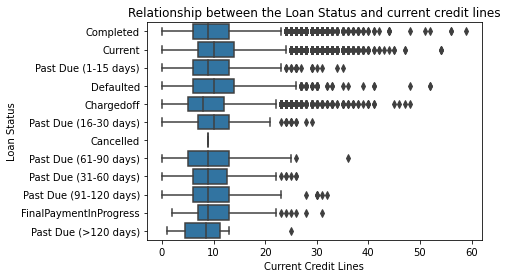

In [43]:
sb.boxplot(data = acquired_values, y = 'LoanStatus', x = 'CurrentCreditLines', color= show_color );
plt.title('Relationship between the Loan Status and current credit lines');
plt.ylabel('Loan Status');
plt.xlabel('Current Credit Lines');

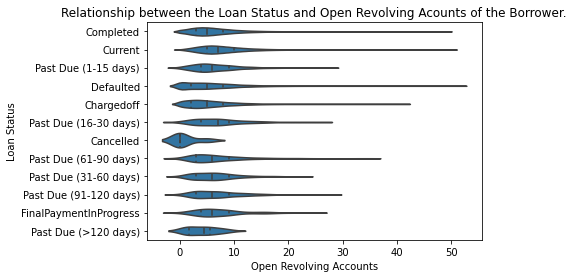

In [44]:
sb.violinplot(data = acquired_values, y = 'LoanStatus', x = 'OpenRevolvingAccounts', color= show_color, inner = 'quartiles' );
plt.title('Relationship between the Loan Status and Open Revolving Acounts of the Borrower.');
plt.ylabel('Loan Status');
plt.xlabel('Open Revolving Accounts');

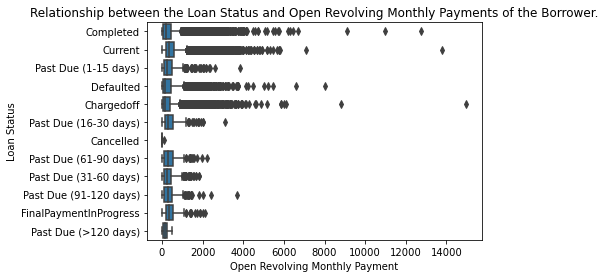

In [45]:
sb.boxplot(data = acquired_values, y = 'LoanStatus', x = 'OpenRevolvingMonthlyPayment', color= show_color);
plt.title('Relationship between the Loan Status and Open Revolving Monthly Payments of the Borrower.');
plt.ylabel('Loan Status');
plt.xlabel('Open Revolving Monthly Payment');

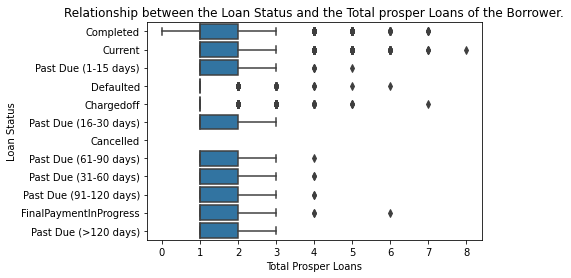

In [46]:
sb.boxplot(data = acquired_values, y = 'LoanStatus', x = 'TotalProsperLoans', color= show_color);
plt.title('Relationship between the Loan Status and the Total prosper Loans of the Borrower.');
plt.ylabel('Loan Status');
plt.xlabel('Total Prosper Loans');

### II. Question: What Can Affect the Borrowers Interest Rate?

It is possible to see below that the scatter plot between BorrowerRate and BorrowerAPR shows us the existence of a positive correlation between them. So we can assume that as BorrowerRate increases, so does BorrowerAPR.

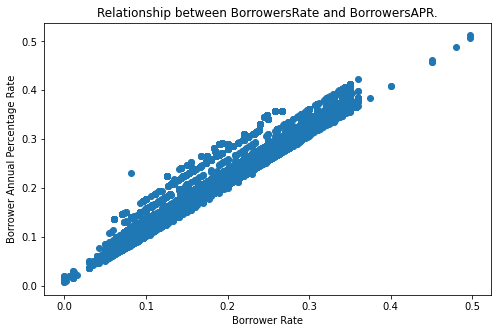

In [47]:
plt.figure(figsize = [8,5]);
plt.scatter(data = acquired_values, x = 'BorrowerRate', y = 'BorrowerAPR');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower Annual Percentage Rate');
plt.title('Relationship between BorrowersRate and BorrowersAPR.');

The following is a heat map that shows the existence of up to 10,000 borrowers between BorrowerRate and OpenRevolvingAccount with BorrowersRate between 0.1 and 0.2 where they have about 5 to 10 OpenRevolvingAccount.

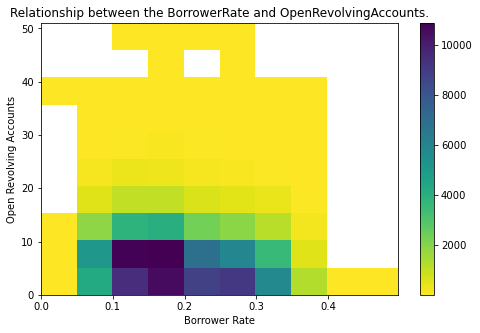

In [48]:
plt.figure(figsize = [8,5]);
plt.hist2d(data = acquired_values, x = 'BorrowerRate', y='OpenRevolvingAccounts', cmap = 'viridis_r', cmin = 1);
plt.colorbar();
plt.title('Relationship between the BorrowerRate and OpenRevolvingAccounts.')
plt.xlabel('Borrower Rate');
plt.ylabel('Open Revolving Accounts');

The heatmap between BorrowerRate and OpenRevolvingMonthlyPayment shows that the largest population of the borrower pays less than 2000 are paid by the largest population of the borrower in their OpenRevolvingAccounts and most of them have BorrowerRate between 0.15 and 0.2.

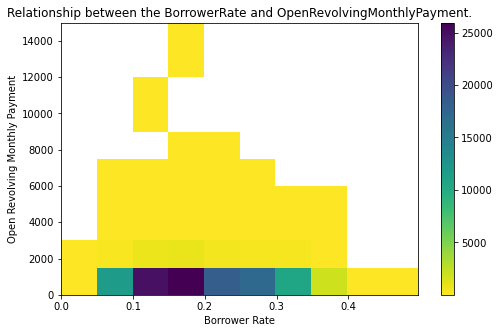

In [49]:
plt.figure(figsize = [8,5]);
plt.hist2d(data = acquired_values, x = 'BorrowerRate', y='OpenRevolvingMonthlyPayment', cmap = 'viridis_r', cmin = 1);
plt.colorbar();
plt.title('Relationship between the BorrowerRate and OpenRevolvingMonthlyPayment.')
plt.xlabel('Borrower Rate');
plt.ylabel('Open Revolving Monthly Payment');

We have this last heatmap between the BorrowerRate and LP_InterestandFees which shows that most of them have BorrowerRate between 0.1 and 0.2 and the largest borrower population pays less than 2000 on their LP_InterestandFees.

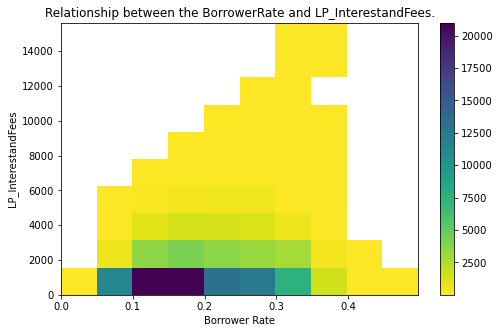

In [51]:
plt.figure(figsize = [8,5]);
plt.hist2d(data = acquired_values, x = 'BorrowerRate', y='LP_InterestandFees', cmap = 'viridis_r', cmin = 1);
plt.colorbar();
plt.title('Relationship between the BorrowerRate and LP_InterestandFees.')
plt.xlabel('Borrower Rate');
plt.ylabel('LP_InterestandFees');

Next we have the scatter plot of CurrentCreditLines versus BorrowerRate which shows that most CurrentCreditLines are between 5 to 15 and 0 to 0.2 BorrowerRate and the regression line slopes down a bit.

vars_of_interest.shape= (113937, 11)
loan_samp.shape= (2000, 11)


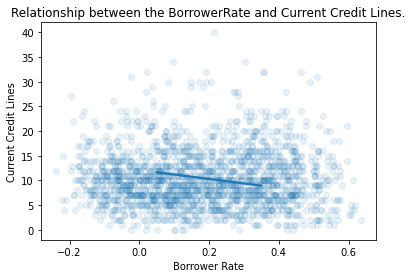

In [50]:
#plot regplot of a sample of 2000 borrowers.
plt.figure(figsize = [6,4]);
print("vars_of_interest.shape=",acquired_values.shape)
loan_samp = acquired_values.sample(n=2000, replace = False)
print("loan_samp.shape=",loan_samp.shape)

sb.regplot(data = loan_samp, x = 'BorrowerRate', y='CurrentCreditLines', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10});
plt.title('Relationship between the BorrowerRate and Current Credit Lines.');
plt.xlabel('Borrower Rate');
plt.ylabel('Current Credit Lines');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the violin plot of the LoanStatus and BorrowerRate, it was discovered that the median of the Completed and FinalPaymentInProgress Status where lower than those of Defaulted and Past Due. This signifies that lower Borrower's Rates are mostly associated with a positive outcome of the LoanStatus while higher Borrower's Rates are associated with the negative outcomes. This also applies to the BorrowersAPR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The scatter plot between the BorrowerRate and BorrowerAPR shows a positive corrolation between them. This indicates that when the BorrowerRate increases the BorrowerAPR increases as well.

## Multivariate Exploration

In this section, we will create plots of three or more variables to further investigate the variables of interest. 

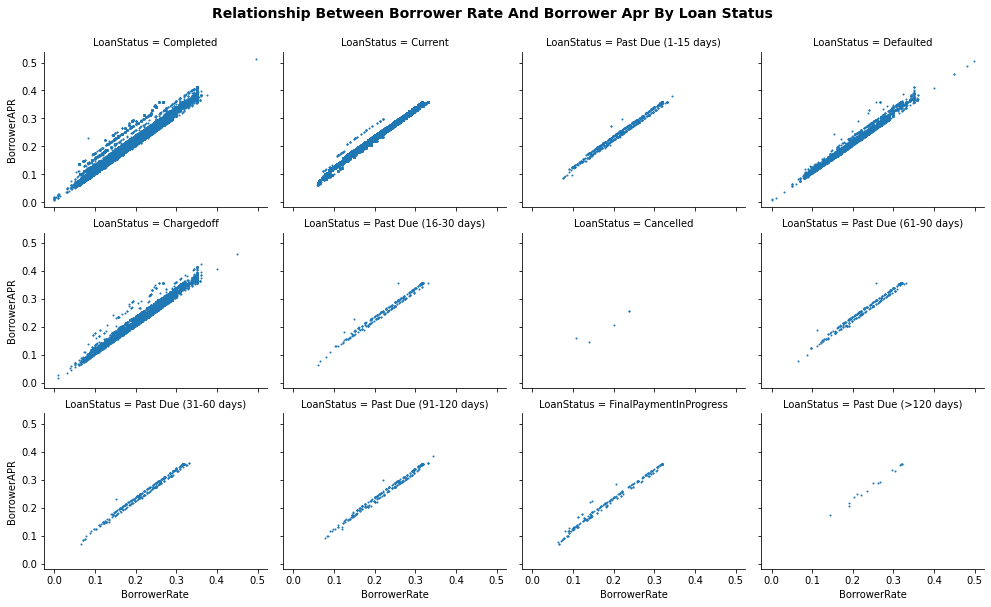

In [148]:
g = sb.FacetGrid(data = acquired_values, col = 'LoanStatus', col_wrap = 4);
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR',s=1 );

g.fig.set_size_inches(14,8);

plt.suptitle("Relationship between borrower rate and borrower apr by Loan status".title(), y = 1.04, fontsize = 14, weight = "bold");

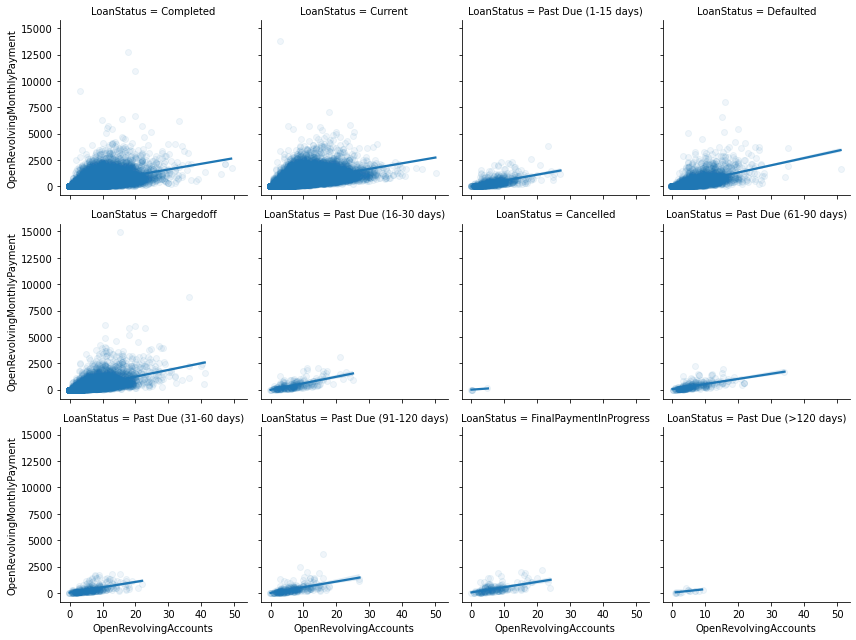

In [150]:
g = sb.FacetGrid(data = acquired_values, col = 'LoanStatus', col_wrap = 4);
g.map(sb.regplot,'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',x_jitter = 0.3, scatter_kws = {'alpha' : 1/15} );

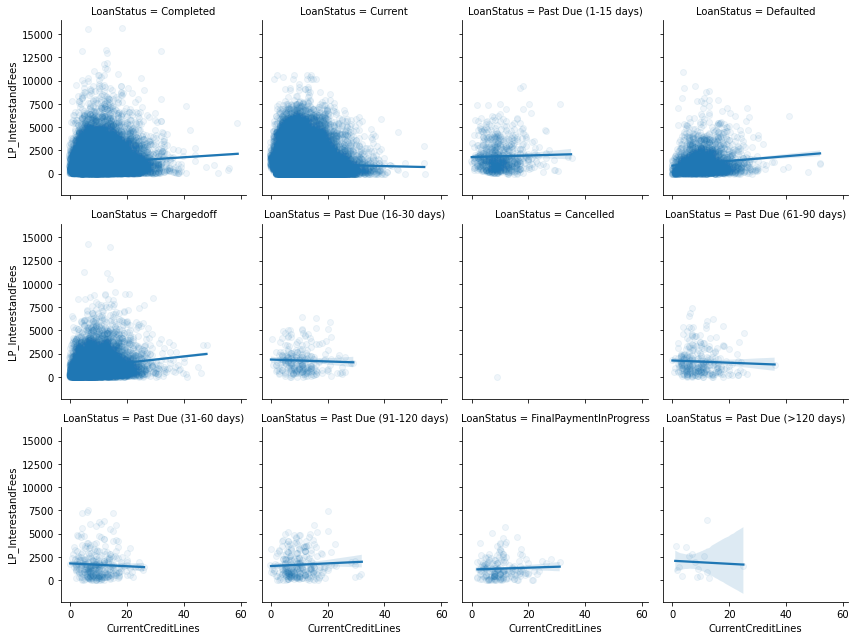

In [54]:
g = sb.FacetGrid(data = acquired_values, col = 'LoanStatus', col_wrap = 4);
g.map(sb.regplot,'CurrentCreditLines', 'LP_InterestandFees',x_jitter = 0.3, scatter_kws = {'alpha' : 1/15} );

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Other observations I got were about comparing BorrowerRate with BorrowerAPR in each LoanStatus category. Multivariate exploration of the data using a faceted scatter plot shows that for each Loan Status, there is an increase in the Loan Rate as the Borrower's APR increases.

### Were there any interesting or surprising interactions between features?

In answer to this question, you can see above the relationship between `OpenRevolvingAccounts` and `OpenRevolvingMonthlyPayment`. It can be seen that these two variables also have a positive correlation between them.